In [9]:
#Analyze the prices of homes in London on a monthly basis
#Use machine learning to predict a trend in home prices in certain neighborhoods
#Start with two specific neighborhoods individually then to a general trend

import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime

In [11]:
london_housing = pd.read_csv("Datasets/housing_in_london_monthly_variables.csv")
london_housing["no_of_crimes"] = london_housing["no_of_crimes"].fillna(0)
london_housing['date'] = pd.to_datetime(london_housing.date)
london_housing = pd.DataFrame(london_housing)
london_housing.fillna(0)

london_housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1
3,1995-04-01,city of london,77101,E09000001,7.0,0.0,1
4,1995-05-01,city of london,84409,E09000001,10.0,0.0,1


In [12]:
london_housing.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [13]:
london_housing.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [14]:
#Compare each of the areas in a line graph

##Reference website: https://datascience.stackexchange.com/questions/29825/create-new-data-frames-from-existing-data-frame-based-on-unique-column-values

# for i in area:
#     while i == i:
#         area_list.append(i)
dict_of_areas =  {k: v for k, v in london_housing.groupby('area')}

import pprint
pprint.pprint(dict_of_areas)

{'barking and dagenham':           date                  area  average_price       code  houses_sold  \
301 1995-01-01  barking and dagenham          50460  E09000002         96.0   
302 1995-02-01  barking and dagenham          51086  E09000002         95.0   
303 1995-03-01  barking and dagenham          51269  E09000002        144.0   
304 1995-04-01  barking and dagenham          53134  E09000002        109.0   
305 1995-05-01  barking and dagenham          53042  E09000002        149.0   
306 1995-06-01  barking and dagenham          53700  E09000002        148.0   
307 1995-07-01  barking and dagenham          52113  E09000002        117.0   
308 1995-08-01  barking and dagenham          52232  E09000002        150.0   
309 1995-09-01  barking and dagenham          51472  E09000002        112.0   
310 1995-10-01  barking and dagenham          51514  E09000002        120.0   
311 1995-11-01  barking and dagenham          50849  E09000002        127.0   
312 1995-12-01  barking and

[302 rows x 7 columns],
 'hammersmith and fulham':            date                    area  average_price       code  \
3618 1995-01-01  hammersmith and fulham         124903  E09000013   
3619 1995-02-01  hammersmith and fulham         122088  E09000013   
3620 1995-03-01  hammersmith and fulham         120636  E09000013   
3621 1995-04-01  hammersmith and fulham         121425  E09000013   
3622 1995-05-01  hammersmith and fulham         124434  E09000013   
3623 1995-06-01  hammersmith and fulham         126175  E09000013   
3624 1995-07-01  hammersmith and fulham         124382  E09000013   
3625 1995-08-01  hammersmith and fulham         123625  E09000013   
3626 1995-09-01  hammersmith and fulham         123094  E09000013   
3627 1995-10-01  hammersmith and fulham         123443  E09000013   
3628 1995-11-01  hammersmith and fulham         121930  E09000013   
3629 1995-12-01  hammersmith and fulham         122723  E09000013   
3630 1996-01-01  hammersmith and fulham         1269

[301 rows x 7 columns],
 'outer london':             date          area  average_price       code  houses_sold  \
10239 1995-01-01  outer london          72959  E13000002       4616.0   
10240 1995-02-01  outer london          72938  E13000002       4290.0   
10241 1995-03-01  outer london          72715  E13000002       5996.0   
10242 1995-04-01  outer london          72592  E13000002       4927.0   
10243 1995-05-01  outer london          72753  E13000002       5813.0   
10244 1995-06-01  outer london          73189  E13000002       6320.0   
10245 1995-07-01  outer london          73666  E13000002       5952.0   
10246 1995-08-01  outer london          73691  E13000002       6291.0   
10247 1995-09-01  outer london          73454  E13000002       5857.0   
10248 1995-10-01  outer london          72972  E13000002       5444.0   
10249 1995-11-01  outer london          72623  E13000002       5831.0   
10250 1995-12-01  outer london          72691  E13000002       5693.0   
10251 1996

In [15]:
pprint.pprint(dict_of_areas.items) 

<built-in method items of dict object at 0x0000021487B6E1F8>


In [16]:
template = '{place} in {data[date]} is located in {data[area]} and had a price of {data[average_price]}'
for place, data in dict_of_areas.items():
    print(template.format(place=place, data=data))

barking and dagenham in 301   1995-01-01
302   1995-02-01
303   1995-03-01
304   1995-04-01
305   1995-05-01
306   1995-06-01
307   1995-07-01
308   1995-08-01
309   1995-09-01
310   1995-10-01
311   1995-11-01
312   1995-12-01
313   1996-01-01
314   1996-02-01
315   1996-03-01
316   1996-04-01
317   1996-05-01
318   1996-06-01
319   1996-07-01
320   1996-08-01
321   1996-09-01
322   1996-10-01
323   1996-11-01
324   1996-12-01
325   1997-01-01
326   1997-02-01
327   1997-03-01
328   1997-04-01
329   1997-05-01
330   1997-06-01
         ...    
572   2017-08-01
573   2017-09-01
574   2017-10-01
575   2017-11-01
576   2017-12-01
577   2018-01-01
578   2018-02-01
579   2018-03-01
580   2018-04-01
581   2018-05-01
582   2018-06-01
583   2018-07-01
584   2018-08-01
585   2018-09-01
586   2018-10-01
587   2018-11-01
588   2018-12-01
589   2019-01-01
590   2019-02-01
591   2019-03-01
592   2019-04-01
593   2019-05-01
594   2019-06-01
595   2019-07-01
596   2019-08-01
597   2019-09-01
598   2

Name: average_price, Length: 301, dtype: int64
kingston upon thames in 6026   1995-01-01
6027   1995-02-01
6028   1995-03-01
6029   1995-04-01
6030   1995-05-01
6031   1995-06-01
6032   1995-07-01
6033   1995-08-01
6034   1995-09-01
6035   1995-10-01
6036   1995-11-01
6037   1995-12-01
6038   1996-01-01
6039   1996-02-01
6040   1996-03-01
6041   1996-04-01
6042   1996-05-01
6043   1996-06-01
6044   1996-07-01
6045   1996-08-01
6046   1996-09-01
6047   1996-10-01
6048   1996-11-01
6049   1996-12-01
6050   1997-01-01
6051   1997-02-01
6052   1997-03-01
6053   1997-04-01
6054   1997-05-01
6055   1997-06-01
          ...    
6297   2017-08-01
6298   2017-09-01
6299   2017-10-01
6300   2017-11-01
6301   2017-12-01
6302   2018-01-01
6303   2018-02-01
6304   2018-03-01
6305   2018-04-01
6306   2018-05-01
6307   2018-06-01
6308   2018-07-01
6309   2018-08-01
6310   2018-09-01
6311   2018-10-01
6312   2018-11-01
6313   2018-12-01
6314   2019-01-01
6315   2019-02-01
6316   2019-03-01
6317   2019

In [35]:
group_areas = pd.DataFrame(london_housing, columns = ['date','area','average_price'])
# group_areas = group_areas[group_areas['area'] == 'city of london']
group_areas = group_areas.groupby(['area','date']).sum()
group_areas = pd.DataFrame(group_areas, index=False)

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [5]:
dt = london_housing['date'].values
dt = dt.astype('datetime64[D]').astype(int)
dt


array([ 9131,  9162,  9190, ..., 18201, 18231, 18262])

In [6]:
london_housing['date'] = dt

In [7]:
hs = london_housing['houses_sold'].values
hs = hs.astype('float64').astype(int)
london_housing['houses_sold'] = hs

In [8]:
london_housing.dtypes

date               int32
area              object
average_price      int64
code              object
houses_sold        int32
no_of_crimes     float64
borough_flag       int64
dtype: object

In [9]:
#do a linear regression line start with a line plot of two different neighborhoods and add a regression line
#compare prices to date for the city of london
city_of_london = london_housing[london_housing['area'] == 'city of london']
city_of_london = city_of_london.replace(-2147483648, 0)

X = city_of_london.iloc[:,0].values.reshape(-1,1)
Y = city_of_london.iloc[:,2].values.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column

Y_2 = city_of_london.iloc[:,4].values.reshape(-1,1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#linear regression for the homes sold
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X, Y_2)
Y_pred_2 = linear_regressor_2.predict(Y_2)

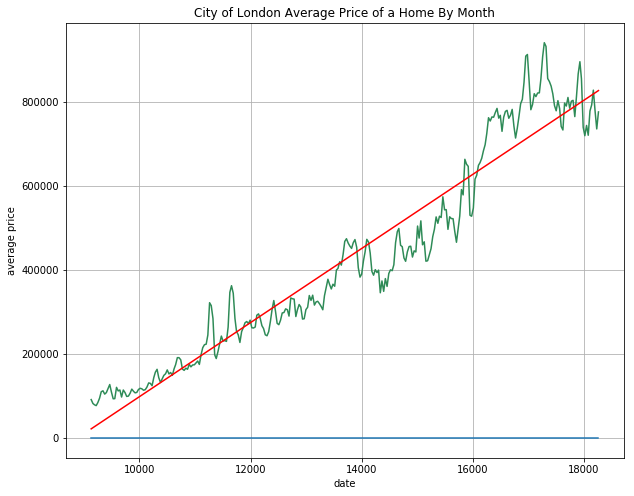

In [18]:
#Linear Regression for the city of London

#compare to houses sold in the city of London
rcParams['figure.figsize'] = 10, 8

plt.plot(X, Y, color = 'seagreen')
plt.plot(X, Y_pred, color='red')
plt.plot(X, Y_pred_2)
plt.grid()

plt.xlabel("date")
plt.ylabel("average price")


plt.title("City of London Average Price of a Home By Month")

plt.show()

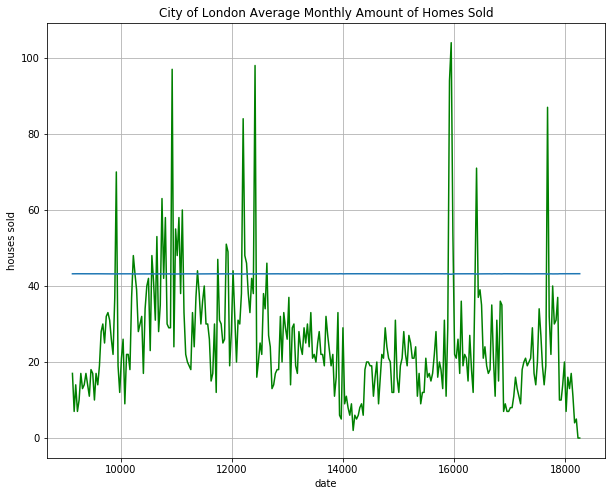

In [19]:
rcParams['figure.figsize'] = 10, 8

plt.plot(X, Y_2, color = "green")
plt.plot(X, Y_pred_2)
plt.grid()

plt.xlabel("date")
plt.ylabel("houses sold")

plt.title("City of London Average Monthly Amount of Homes Sold")

plt.show()

In [ ]:
#k nearest numbers to predict the prices by the neighborhood or houses sold